In [1]:
#Import neccesary libraries
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
#Dowloading the Dataset
!git clone https://github.com/cvrg-iyte/DATA602repo.git
import pandas as pd
df = pd.read_csv("./DATA602repo/grain_dataset.csv")

xcode-select: note: No developer tools were found, requesting install.
If developer tools are located at a non-default location on disk, use `sudo xcode-select --switch path/to/Xcode.app` to specify the Xcode that you wish to use for command line developer tools, and cancel the installation dialog.
See `man xcode-select` for more details.


In [3]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.shape

(13611, 17)

Part 1) Split your data into train and test sets (you can use built-in function: from sklearn.model_selection import train_test_split). Train your Logistic Regression model and evaluate on test data. No need to create a validation set this time.

In [5]:
#Extracting features (X) and target (y)
X = df.drop("Class", axis=1)
y = df["Class"]

#Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:


#Creating a Logistic Regression model
lr = LogisticRegression()

#Training the model on the training data
lr.fit(X_train, y_train)


/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:


#Making predictions on the test data
y_pred = lr.predict(X_test)

#Calculating the accuracy score
score = accuracy_score(y_test, y_pred)

#Printing the test accuracy score
print("Test accuracy (score) without Validation:", score)


Test accuracy (score) without Validation: 0.6937201615864855


Part 2) Apart from the default C value, try a range (around 10) of C values and show which one (or which range) has the highest performance on test accuracy (score).

/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

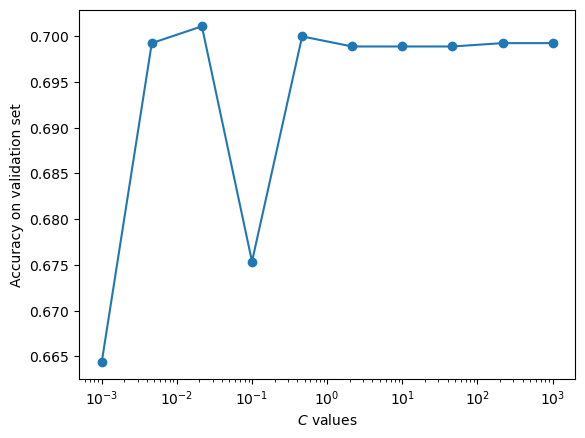

In [8]:
#Initializing a range of C values
cvals = np.logspace(-3, 3, num=10)
results = np.zeros(10)
index = 0
best_accuracy = 0
best_C = 0

#Loop to check accuracy for all C values
for cv in cvals:
    #Create and train a Logistic Regression model with the current C value
    lr = LogisticRegression(C=cv)
    lr.fit(X_train, y_train)
    
    #Make predictions on the test data
    y_pred = lr.predict(X_test)
    
    #Calculate accuracy for the current C value
    accuracy = accuracy_score(y_test, y_pred)
    results[index] = accuracy
    index += 1
    
    #Finding the C value with the highest performance
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = cv

#Plotting a graph to visualize the relationship between C values and accuracy
pyplot.plot(cvals, results, marker='o', linestyle='-')
pyplot.xscale('log')
pyplot.xlabel('$C$ values')
pyplot.ylabel('Accuracy on validation set')
pyplot.show()




In [9]:


#Printing the best C value and its corresponding highest performance score
print("C value with the highest performance on test accuracy is:", best_C)
print("Highest Performance score:", best_accuracy)

C value with the highest performance on test accuracy is: 0.021544346900318832
Highest Performance score: 0.70106500183621
